## Observations and Insights 

##### The data provided for this task is of a study of  drug regimens for a group of mice and observing the effectiveness of various drugs.  Treating the mice with Capomulin, and looking at the volume of  tumors developed versus treating them with other drugs and looking at the volume of tumors developed. #####First the statitics for each drug regimen and the volumes for tumors was calculated. Statistics included mean, median, standard deviation and SEM etc., were calculated.Bar graphs for each drug versus the volume of tumors at various time points were generated. Pie charts depicting the sex of the mice in the study was plotted
###### Next box plots showed that the set of 4 efficient drugs had similar volumes of tumors across the set of mice. There were very few outliers
##### The regression plot showed that for the mice that were heavier, the volume of tumors were higher

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_study_merged


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice.
count = mouse_study_merged["Mouse ID"].value_counts()
count

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Extract duplicate rows 
duplicated = mouse_study_merged[mouse_study_merged.duplicated(subset=["Mouse ID", "Timepoint"], keep='last')]

duplicated


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_mouse_study = mouse_study_merged.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')

cleaned_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice in the clean DataFrame.
count = cleaned_mouse_study["Mouse ID"].value_counts()
count

k403    10
o287    10
j755    10
j984    10
k210    10
        ..
f932     1
v199     1
t573     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

grouped_study_df = cleaned_mouse_study.groupby(["Drug Regimen"])
print(grouped_study_df)
grouped_study_df.count().head(20)



,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [32]:
# Calculate the Mean of Tumor Volumes for each Drug Regimen

mean_tumor_by_regimen_df = pd.DataFrame(
    grouped_study_df[["Tumor Volume (mm3)"]].mean()
   )
mean_tumor_by_regimen_df


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.393463
Ramicane,40.216745
Stelasyn,54.233149


In [33]:
#Calculate the Median of the Tumor Volumes per Drug Regimen

median_tumor_by_regimen_df = pd.DataFrame(
    grouped_study_df[["Tumor Volume (mm3)"]].median()
   )
median_tumor_by_regimen_df

# Declare a Dataframe to hold all the statistical values calculated

# Add the Mean and Median of Tumor Volumes to the Summary Dataframe
summary_df = pd.merge(mean_tumor_by_regimen_df, median_tumor_by_regimen_df, on='Drug Regimen', how='inner')

# Change the name of the columns to reflect what they stand for
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)_x' : 'Mean of tumor volumes'})
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)_y' : 'Median'})
summary_df

,Mean of tumor volumes,Median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.393463,50.909965
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [34]:
# Calculate the variance of Tumor Volumes

var_tumor_by_regimen_df = pd.DataFrame(
    grouped_study_df[["Tumor Volume (mm3)"]].var()
   )

#Add Variances to the summary table
summary_df = pd.merge(summary_df, var_tumor_by_regimen_df, on='Drug Regimen', how='inner')

summary_df = summary_df.rename(columns={'Tumor Volume (mm3)' : 'Variance'})

summary_df

,Mean of tumor volumes,Median,Variance
Drug Regimen,,,
Capomulin,40.675741,41.557809,24.947764
Ceftamin,52.591172,51.776157,39.290177
Infubinol,52.884795,51.820584,43.128684
Ketapril,55.235638,53.698743,68.553577
Naftisol,54.331565,52.509285,66.173479
Placebo,54.033581,52.288934,61.168083
Propriva,52.393463,50.909965,43.138803
Ramicane,40.216745,40.673236,23.486704
Stelasyn,54.233149,52.431737,59.450562


In [35]:
# Calculate the Standard Deviation of Tumor Volumes
std_tumor_by_regimen_df = pd.DataFrame(
    grouped_study_df[["Tumor Volume (mm3)"]].std()
   )

#Add Standard Deviations to the summary table
summary_df = pd.merge(summary_df, std_tumor_by_regimen_df, on='Drug Regimen')
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)' : 'Standard Deviation'})
summary_df

,Mean of tumor volumes,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.393463,50.909965,43.138803,6.568014
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [36]:
# Calculate the SEM of Tumor Volumes
sem_tumor_by_regimen_df = pd.DataFrame(
    grouped_study_df[["Tumor Volume (mm3)"]].sem()
   )

#Add SEM to the summary table
summary_df = pd.merge(summary_df, sem_tumor_by_regimen_df, on='Drug Regimen')
summary_df = summary_df.rename(columns={'Tumor Volume (mm3)' : 'Standard Error of Mean Vs Standard Deviation'})
summary_df

,Mean of tumor volumes,Median,Variance,Standard Deviation,Standard Error of Mean Vs Standard Deviation
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# Using the aggregation method, produce the same summary statistics in a single line

summary2_df = cleaned_mouse_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

# Change the table names
summary2_df = summary2_df.rename(columns={'mean' : 'Mean', 'median' : 'Median',
                                       'var': 'Variance', 'std':'Standard Deviation', 'sem':'SEM'})
summary2_df

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.393463  50.909965  43.138803           6.568014   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.525862  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64


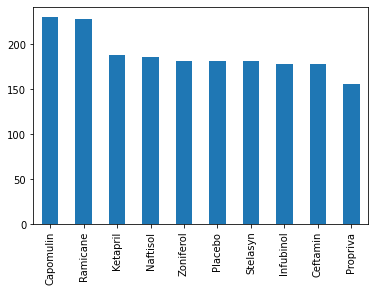

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

counts = cleaned_mouse_study["Drug Regimen"].value_counts()
print(counts)

ax = counts.plot.bar(rot=90)

([<matplotlib.axis.XTick at 0x242ab141040>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

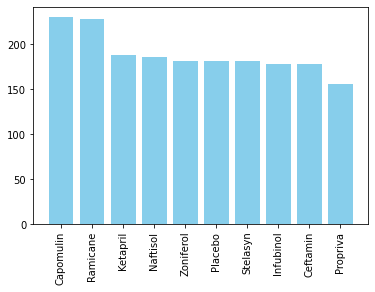

In [52]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

counts = cleaned_mouse_study["Drug Regimen"].value_counts()
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, color="skyblue", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values, rotation='vertical')



Male      958
Female    930
Name: Sex, dtype: int64


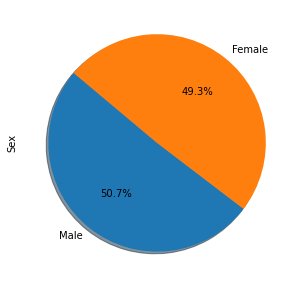

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts_pie = cleaned_mouse_study["Sex"].value_counts()
print(counts_pie)
plot = counts_pie.plot.pie(y='Sex', figsize=(5, 5),autopct="%1.1f%%", shadow=True, startangle=140)

Male      958
Female    930
Name: Sex, dtype: int64


([<matplotlib.patches.Wedge at 0x242a6557700>,
 [Text(-0.6872462450269542, -0.8588903298421469, 'Male'),
  Text(0.6872463254420675, 0.8588902654975058, 'Female')],
 [Text(-0.37486158819652043, -0.46848563445935276, '50.7%'),
  Text(0.3748616320593095, 0.46848559936227585, '49.3%')])

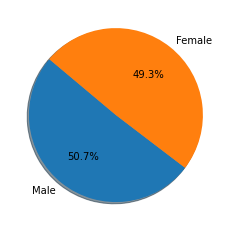

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts_pie = cleaned_mouse_study["Sex"].value_counts()
Label = counts_pie.index.values
print(counts_pie)
plt.pie(counts_pie,autopct="%1.1f%%", labels=Label,shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = study_results.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint_df


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [43]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint_df ,cleaned_mouse_study, on=["Mouse ID","Timepoint"], how="inner")
last_timepoint_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_drugs = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
  
for drug in list_of_drugs:
    temp_tumor_df = last_timepoint_data[last_timepoint_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]  
    for row in temp_tumor_df:
        tumor_vol_data.append(row)
        
print(tumor_vol_data)       
temp_tumor_df

[38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384, 38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552, 40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575, 67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.3213458, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141, 62.99935619, 45.0, 56.05774909,

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
76     47.784682
89     61.849023
95     68.923185
107    67.748662
108    57.918381
110    46.784535
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
185    45.000000
189    52.925348
190    45.000000
210    67.527482
224    45.000000
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [45]:
#Determine if there are any potential outliers. 
tumor_vol_list = []
outlier_tumor_vol_list = []

# For each drug on the list, loop through and find the potential outlier statistics
for drug in list_of_drugs: 
        temp_tumor_df = last_timepoint_data[last_timepoint_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]  
        quartiles = temp_tumor_df.quantile([.25,.5,.75])
        tumor_vol_list.append(temp_tumor_df)
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq

        print (drug)
        print(f"The lower quartile of Tumor Volume is: {lowerq}")
        print(f"The upper quartile of Tumor Volume is: {upperq}")
        print(f"The interquartile range of Tumor Volume is: {iqr}")
        print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

        # Determine outliers using upper and lower bounds
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)

        print(f"Values below {lower_bound} could be outliers.")
        print(f"Values above {upper_bound} could be outliers.")

        outlier_tumor_volume =  temp_tumor_df.loc[(temp_tumor_df  < lower_bound) | (temp_tumor_df  > upper_bound)]

        outlier_tumor_vol_list.append(outlier_tumor_volume) 

# The list below contains the outlier
outlier_tumor_vol_list


Capomulin
The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Infubinol
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Ceftamin
The lower quartile of Tumor Volume is:

[Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 31    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 Series([], Name: Tumor Volume (mm3), dtype: float64)]

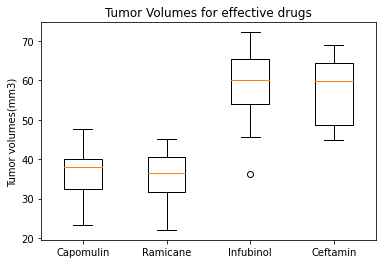

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volumes for effective drugs")
ax1.set_ylabel("Tumor volumes(mm3)")
ax1.boxplot( tumor_vol_list, labels = list_of_drugs)
plt.show()



## Line and Scatter Plots

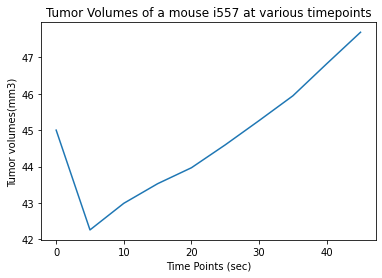

In [47]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cleaned_mouse_study_capomulin = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Capomulin"]

cleaned_mouse_study_capomulin

# # Get the data for a mouse with ID i557
cleaned_amouse_capomulin = cleaned_mouse_study_capomulin.loc[cleaned_mouse_study_capomulin["Mouse ID"] == "i557"]
cleaned_amouse_capomulin 

# Plot the line
plt.title("Tumor Volumes of a mouse i557 at various timepoints")
plt.ylabel("Tumor volumes(mm3)")
plt.xlabel("Time Points (sec)")
plt.plot(cleaned_amouse_capomulin["Timepoint"], cleaned_amouse_capomulin["Tumor Volume (mm3)"])
plt.show()

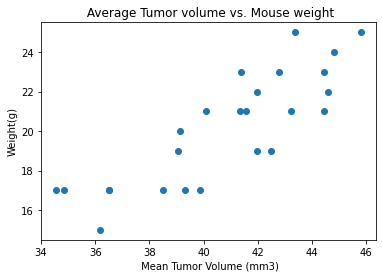

In [48]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Group the dataframe by Mouse ID and calculate the mean tumor voulme of each mouse over different timepointd
grouped_capomulin = cleaned_mouse_study_capomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

grouped_capomulin

# With the dataframe, draw a scatterplot
plt.scatter(grouped_capomulin["Tumor Volume (mm3)"],grouped_capomulin["Weight (g)"])
plt.title(" Average Tumor volume vs. Mouse weight")
plt.xlabel(" Mean Tumor Volume (mm3)")
plt.ylabel("Weight(g)")

plt.show()

## Correlation and Regression

In [49]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(grouped_capomulin["Weight (g)"],grouped_capomulin["Tumor Volume (mm3)"]) 
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


The r-squared is: 0.7088568047708723


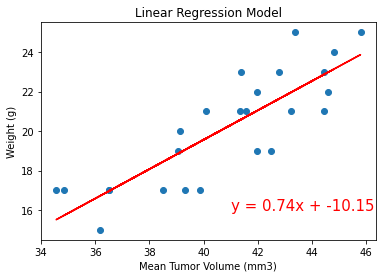

In [50]:
# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = grouped_capomulin["Tumor Volume (mm3)"]
y_values = grouped_capomulin["Weight (g)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue**2}")

# Plot the results
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(41,16),fontsize=15,color="red")
plt.title("Linear Regression Model")
plt.xlabel("Mean Tumor Volume (mm3)")
plt.ylabel('Weight (g)')
plt.show()

